In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/movies_train.csv'
df = pd.read_csv(url)
col_discription = ['제목','배급사','장르','개봉일','상영시간','상영등급','감독이름','감독 이전작품 평균 관객수', '감독 이전 작품수', '스탭수', '주연배우수', '관객수']
df.columns
pd.DataFrame(col_discription,index=df.columns)

,0
title,제목
distributor,배급사
genre,장르
release_time,개봉일
time,상영시간
screening_rat,상영등급
director,감독이름
dir_prev_bfnum,감독 이전작품 평균 관객수
dir_prev_num,감독 이전 작품수
num_staff,스탭수


In [ ]:
# 결측치가 있는 데이터의 감독은 누구?
# 결측치 주변 데이터를 확인 후 살릴지 , 죽일지 선택.
# 결측치가 생긴 원인 파악 후 이전 영화가 없는 감독이면 정상적인 데이터  NA -> 0으로 대체해야함

In [9]:
df.info()
# 정보 먼저 보면 dir_prev_bfnum 결측치 있는 coloumns 임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
df[df['dir_prev_bfnum'].isna()] # 감독 이전 작품 개수

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [13]:
df.fillna(0)
df.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [17]:
df.isna().mean()

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [ ]:
df.describe() # 수치형 데이터

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


수치형 데이터

<Axes: >

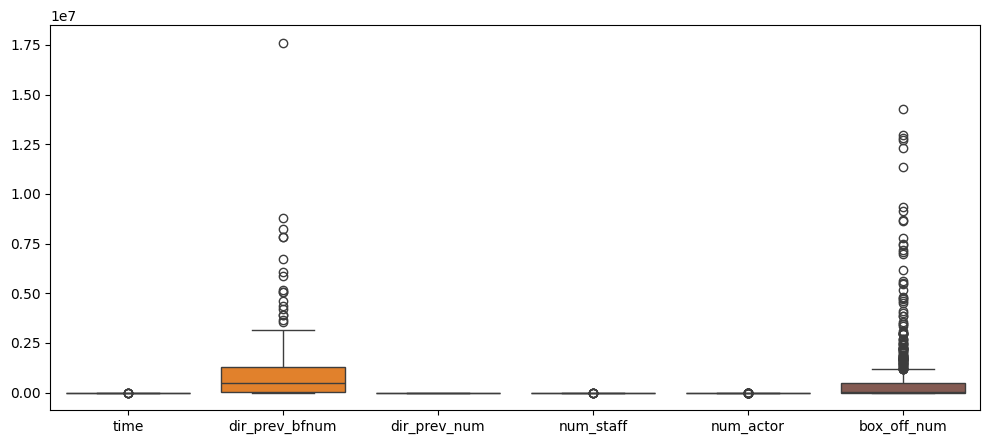

In [16]:
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize=(12,5))
sns.boxplot(data=df)

<Axes: >

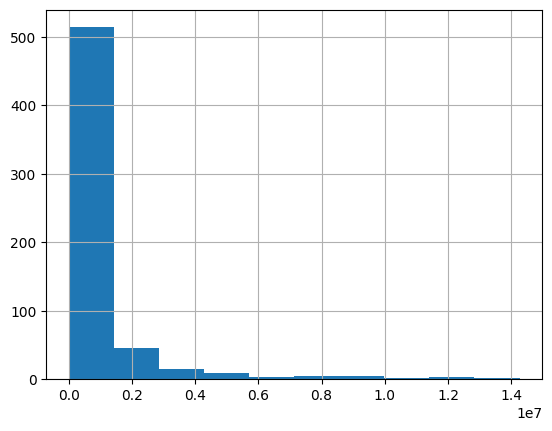

In [18]:
df.box_off_num.hist()

In [ ]:
# 데이터 분포특성
# 왼쪽으로 치우쳐져서 오른쪽 꼬리가 긴 형태 (대부분의 관객수는 5만명대에 형성되어 있음)
# outliner가 많고 크다 / 즉, 히트작의 영향이 크다

<Axes: >

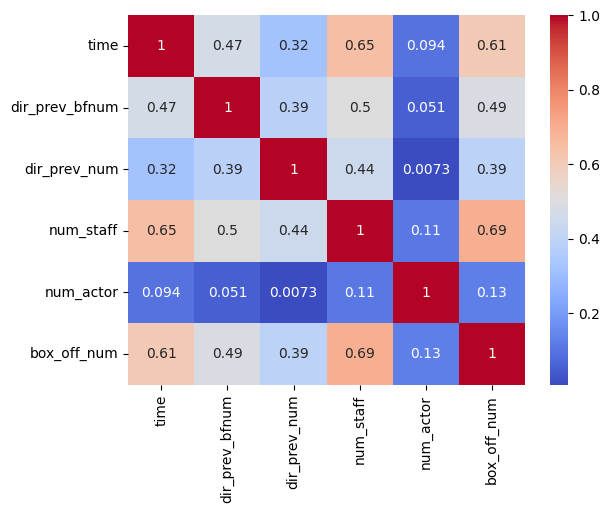

In [ ]:
# 관객수 예측하는 데이터
# 관객수 box_off_num  과 높은 상관관계를 가지는 변수를 

corr = df.corr(method = 'spearman',numeric_only=True)
sns.heatmap(corr,annot = True,cmap='coolwarm')
# 관객수는 상영시간과 스탭수에서 높은 상관관계를 나타냄!
# 상영시간이 길수로 관객수가 증간하는 경향

범주형 데이터 _ 변수 분석

In [ ]:
df.describe(include=['object','category'])

In [24]:
df['box_off_num'].corr(df['time'])


np.float64(0.4414523915408284)

In [25]:
df['box_off_num'].corr(df['time'],method='spearman')

np.float64(0.6094410730461675)

상관계수
'''
상관계수 :  두 변수간의 관계 강도와 방향을 측정하는 통계지표
피어슨 상관계수 : 선형관계를 측정, 데이터가 정규분포를 따르고 선형일때 
스피어 상관계수 : 순위기반이면서 비선형관계나 또는 순서데이터 (예: 순위 , 순서나 크기)
공톹점 : -1 과 1 사이
'''
![image.png]
'''
피어슨 상관계수
두 변수 x,y의 공분산을 각 변수의 표준편차로 나눈 값
1. 각 변수의 평균을 계산 ( ☆ 주로 평균을 가지고 계산한다 ☆ ) 평균은 이상치에 영향을 미침
2. 각 데이터의 포인트에서 평균을 뺀 값을 계산
3. 편차들의 곱의 합을 구해서 제곱? (공분산에서 분자 계산) = 분자가 됨. 제곱하는 이유는 절댓값 ( - 없앨라고. )
4. 분자 / (분모의 제곱근)으로 계산
'''
데이터가 연속적이고 선영 관계에 적합


스피어만 상관계수
'''
두 변수의 순위(rank)를 변환한 후 적용 - 실제데이터 값 대신에 순위를 사용
'''

'''
1. 각 변수 x와 y 의 데이터를 오름차순으로 정렬해 순위 ㅂ주여 (동점 평균 순위 사용)
2. 각 데이터 쌍의 순위 차이 (di = rankx - ranky)
3. di^2합 계산
4. 1 - ( di^2 합 계산 / n(n(n^2-1)))    응????
'''
이상치나 비선형 관계에 적합




In [ ]:
# x(온도) , y(아이스크림 판매량)
import numpy as np

x = np.array([25,25,30,36,40])
y = np.array([10,15,20,25,30])
x_mean = x.mean()
y_mean = y.mean()

# x , y 편차
x_ = x - x_mean
y_ = y - y_mean
# 편차의 곱 합
(x_ * y_).sum()

# 편차의 제곱의 합
(x_**2).sum() , (y_**2).sum()

# 분모
(x_**2).sum() * (y_**2).sum()
np.sqrt((x_**2).sum() * (y_**2).sum()) # sqrt =  루트 명령..

(x_ * y_).sum() / np.sqrt((x_**2).sum() * (y_**2).sum())

# 1이 아닌 0.998    /   1에 가까울수록 이상치 안정적.


np.float64(0.9696167281728243)

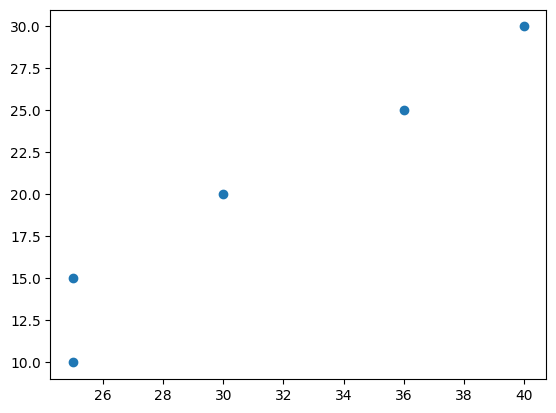

In [37]:
import matplotlib.pylab as plt

plt.scatter(x,y)

In [38]:
#
#
#